In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [80]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Neural Network

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [83]:
x=df.drop("label",axis=1)
y= df.label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = Sequential([
    Dense(units=785, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(units=350, activation='relu'),
    Dense(units=10)  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10


c:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8341 - loss: 6.8754
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9435 - loss: 0.2039
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9483 - loss: 0.1894
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9589 - loss: 0.1547
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9627 - loss: 0.1414
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9620 - loss: 0.1408
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9661 - loss: 0.1199
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9663 - loss: 0.1248
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9744 - loss: 0.0967
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9736 - loss: 0.1053
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9665 - loss: 0.1939
Test Accuracy: 0.9689285755157471


In [84]:
pred= model.predict(x_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [85]:
pred_categorical=np.argmax(pred,axis=1)

In [56]:
pred_categorical


array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [57]:
matrix = confusion_matrix(pred_categorical,y_test)

In [64]:
matrix

array([[794,   0,   2,   0,   1,   0,   3,   0,   0,   1],
       [  0, 900,   1,   1,   1,   0,   1,   2,   2,   1],
       [  4,   2, 806,   1,   0,   1,   1,   5,   1,   0],
       [  1,   0,  13, 889,   0,   3,   0,   6,   6,   4],
       [  3,   0,   4,   0, 811,   0,   2,   0,   1,   1],
       [  0,   1,   0,  25,   0, 685,   2,   0,   4,   3],
       [  1,   0,   0,   0,   2,   0, 729,   0,   0,   0],
       [  0,   0,   7,   5,   2,   1,   0, 869,   4,  14],
       [ 13,   6,  12,   8,   8,   7,  47,   2, 816,   8],
       [  0,   0,   1,   8,  14,   5,   0,   9,   1, 806]], dtype=int64)

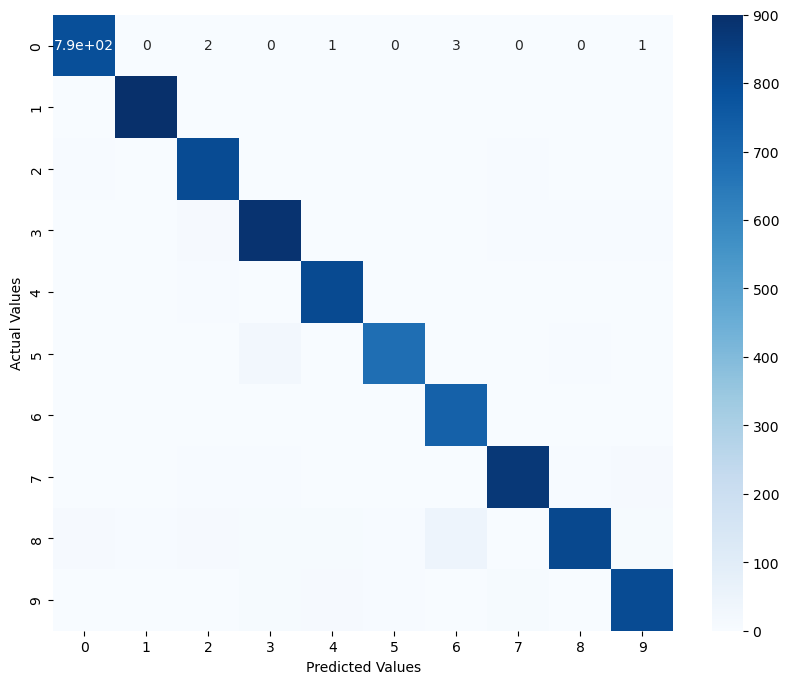

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix , annot =True , cmap='Blues',cbar=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [73]:
df2 = pd.read_csv("test.csv")
df2


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
pred2 = model.predict(df2)
pred2_categorical = np.argmax(pred2,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [87]:
pred2_categorical

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [89]:
prediction_df = pd.DataFrame(pred2_categorical,columns=["Label"])
prediction_df.index = prediction_df.index + 1
prediction_df.to_csv("pred.csv",index =True,index_label="ImageId")